# Image Search With ChromaDB
by Gaurav Kabra

In [1]:
!pip3 install --upgrade chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.9 MB/s eta 0:00:

In [2]:
import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader

In [4]:
client = chromadb.PersistentClient(path="./gaurav_img_srch")

In [8]:
!pip3 install open-clip-torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
  

In [9]:
loader = ImageLoader()
img_ef = OpenCLIPEmbeddingFunction()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [11]:
collection = client.get_or_create_collection(name="gaurav_img_srch_collection", embedding_function=img_ef, data_loader=loader)

In [12]:
collection.add(
    ids=['0', '1'],
    uris=['./lion.jpeg', './tiger.jpg']
)

In [13]:
collection.count()

2

In [21]:
queries = ['tiger']

results = collection.query(
    query_texts=queries,
    n_results=1,
    include=["documents", "metadatas", "distances", "uris"]
)
results

{'ids': [['1']],
 'embeddings': None,
 'documents': [[None]],
 'uris': [['./tiger.jpg']],
 'data': None,
 'metadatas': [[None]],
 'distances': [[1.3856981331260145]],
 'included': [<IncludeEnum.distances: 'distances'>,
  <IncludeEnum.documents: 'documents'>,
  <IncludeEnum.uris: 'uris'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_image(results):
  if 'uris' in results and results['uris']:
    for image_uri in results['uris'][0]:
        try:
            img = mpimg.imread(image_uri)
            imgplot = plt.imshow(img)
            plt.show()
        except FileNotFoundError:
            print(f"Image not found: {image_uri}")
        except Exception as e:
            print(f"Error displaying image {image_uri}: {e}")
  else:
      print("No image URIs found in the results.")


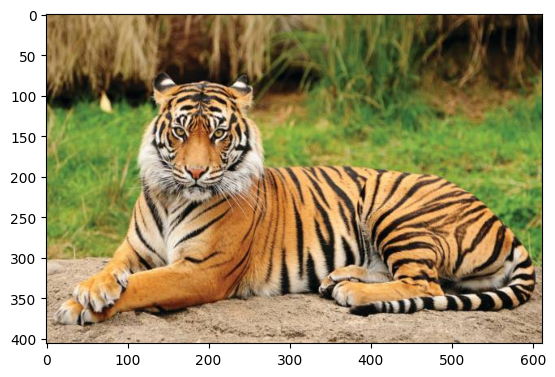

In [24]:
display_image(results)

In [25]:
collection.add(
    ids=['2'],
    uris=['./broccoli_dish.jpg']
)

In [26]:
collection.count()

3

In [27]:
queries = ['dish']

results = collection.query(
    query_texts=queries,
    n_results=1,
    include=["documents", "metadatas", "distances", "uris"]
)

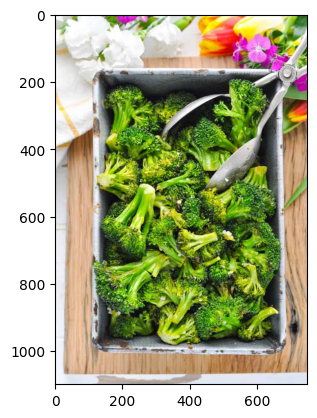

In [28]:
display_image(results)

In [29]:
collection.update(
    ids=['0', '1', '2'],
    uris=['./lion.jpeg', './tiger.jpg', './broccoli_dish.jpg'],
    metadatas=[{'category': 'animal'}, {'category': 'animal'}, {'category': 'dish'}]
)

In [30]:
collection.count()

3

In [31]:
queries = ['dish']

results = collection.query(
    query_texts=queries,
    n_results=3,
    include=["documents", "metadatas", "distances", "uris"]
)

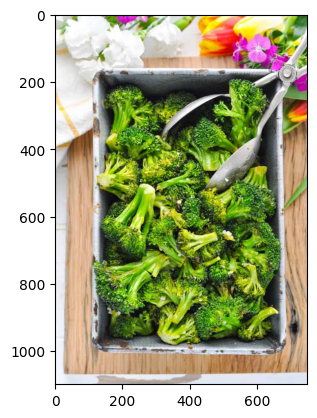

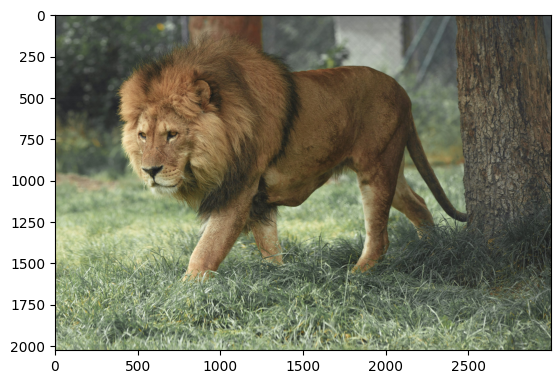

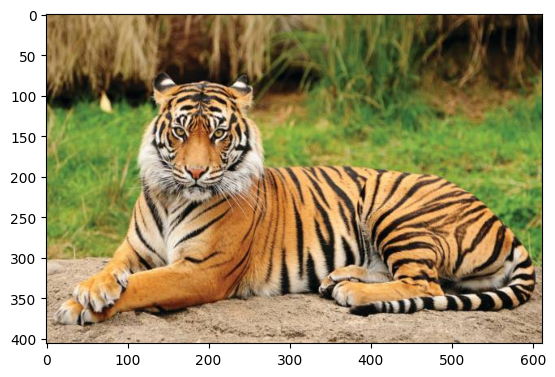

In [32]:
display_image(results)

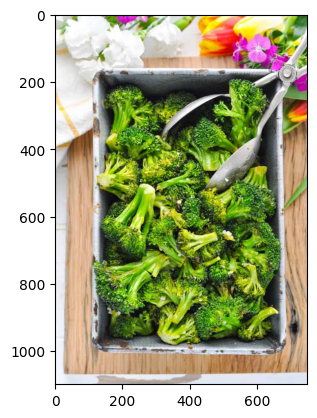

In [37]:
results = collection.query(
    query_texts=queries,
    n_results=3,
    include=["documents", "metadatas", "distances", "uris"],
    where={"category": "dish"}    # where clause applied to metadata
)
display_image(results)

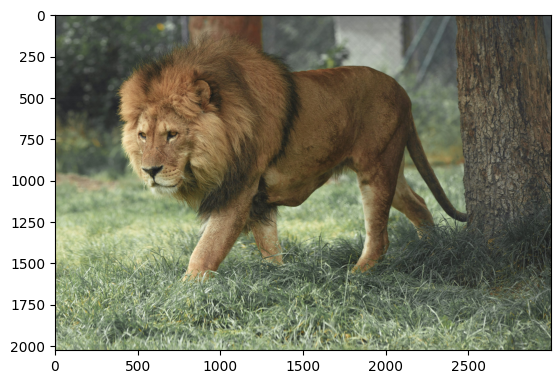

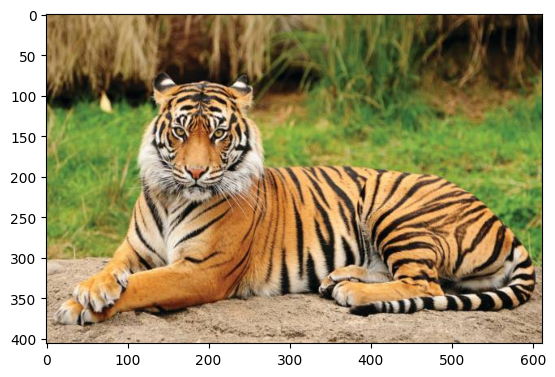

In [41]:
results = collection.query(
    query_texts=queries,
    n_results=3,
    include=["documents", "metadatas", "distances", "uris"],
    where={"category": {'$ne': "dish"}}    # ne = not equal, eq = equal
)
display_image(results)

Notice how in above box, queries was on dish but ChromaDB focusssed on where clause 😟

by Gaurav Kabra